<a href="https://colab.research.google.com/github/sudeepbhagat11/Lyme-Disease-Detection-CNN/blob/main/Lyme_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lyme-disease-rashes:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F891936%2F4939390%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240621%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240621T152846Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6053c875b6c8837972d65d809fdf1b422ec07c825b18635a8801c786a611796ff2bb4ff778bb6b4b437d1cdb0a1cb21128b3771c78a5c7e4ad32efb8881995fbd5616436c249ac2dab32884f4a16c9c686caa9d85bed399cad5b7f53ee1b58ab4bcf5f93278d85cff4055141e9d93c46281541b74fcc1ce0b4d58d5a3d783753d467f929ffc809418e8ab0f7564fb78981582ad5ae3ea00d8a5870d40c130c1d77c3f81d81cf4b8d22cde1d92efeb48145934db7b8e50e3b2b22d0e8a050e9320c51452aa30aeb09d0680e82b7fea8bd083f3d93f9b88e28e86d67f90114bc99b83f4a8b3e867d370031514fa2f6cb59ded40c73c876031d33c033a36a724639'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 150405422 bytes downloaded
Downloaded and uncompressed: lyme-disease-rashes
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/lyme-disease-rashes/RashData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm46.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm120.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm119.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm30.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm124.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm56.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm141.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm3.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/ringworm116.jpg
/kaggle/input/lyme-disease-rashes/RashData/RashData/Lyme_Negative_By_Disease/RingWorm/r

In [3]:
from numpy import asarray

from PIL import Image
# load the image
image = Image.open('/kaggle/input/lyme-disease-rashes/RashData/RashData/Train/Train_2_Cases/Lyme_Positive/erythema migrans74.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
pixels = asarray(image)

JPEG
RGB
(1280, 820)


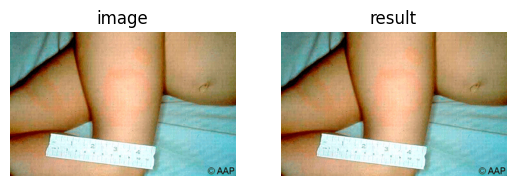

In [4]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(pixels)
ax1.axis('off')
ax1.set_title('result')
plt.show()

In [5]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [6]:
TRAIN_DIR = '/kaggle/input/lyme-disease-rashes/RashData/RashData/Train/Train_2_Cases'

TEST_DIR = '/kaggle/input/lyme-disease-rashes/RashData/RashData/Validation/Validation_2_Cases'

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input


HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
drop = 0.5
EPOCHS = 100



In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

In [9]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)

Found 357 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [10]:
def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(drop)(x)

    predictions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs=base_model.input, outputs=predictions)
    return finetune_model

In [11]:
base_model_1 = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT,WIDTH,3))

94765736/94765736 [==============================] - 5s 0us/step


In [12]:
resnet50_model = build_model(base_model_1,
                                      dropout = drop,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

In [13]:
from keras.optimizers import Adam

resnet50_model.compile(optimizer=Adam(learning_rate=1e-5), loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 306, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 150, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [15]:
history = resnet50_model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=20,
    validation_data=test_generator,

    shuffle=True
)


Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.7574 - accuracy: 0.4500

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 21s 543ms/step - loss: 1.7574 - accuracy: 0.4500 - val_loss: 0.7916 - val_accuracy: 0.5862
Epoch 2/100
20/20 [==============================] - 8s 409ms/step - loss: 1.5697 - accuracy: 0.5188 - val_loss: 0.6330 - val_accuracy: 0.6667
Epoch 3/100
20/20 [==============================] - 9s 448ms/step - loss: 1.3382 - accuracy: 0.5669 - val_loss: 0.6092 - val_accuracy: 0.6207
Epoch 4/100
20/20 [==============================] - 7s 334ms/step - loss: 1.2302 - accuracy: 0.5938 - val_loss: 0.6827 - val_accuracy: 0.5977
Epoch 5/100
20/20 [==============================] - 8s 386ms/step - loss: 1.3376 - accuracy: 0.5813 - val_loss: 0.6180 - val_accuracy: 0.6552
Epoch 6/100
20/20 [==============================] - 8s 399ms/step - loss: 1.1644 - accuracy: 0.5813 - val_loss: 0.6963 - val_accuracy: 0.6207
Epoch 7/100
20/20 [==============================] - 9s 475ms/step - loss: 1.3240 - accuracy: 0.5813 - val_loss: 0.6285 - val_accuracy: 0.6207
Epoch 8/10

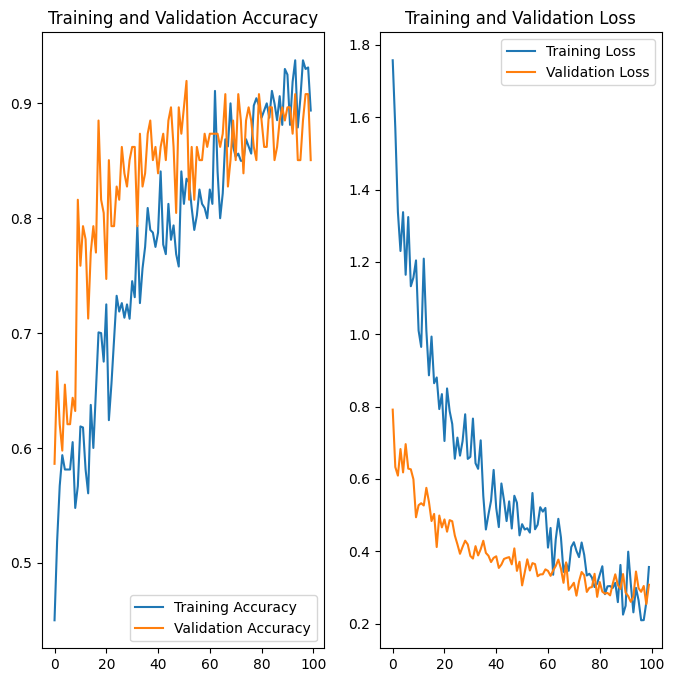

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
resnet50_model.save("Lyme_Detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
